<a href="https://colab.research.google.com/github/Gaurangg1404/learning-AI-ML/blob/main/CVday1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2024-02-05 20:27:12--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.175.207, 74.125.24.207, 142.251.10.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.175.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  22.8MB/s    in 6.6s    

2024-02-05 20:27:19 (15.7 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train/

pizza  steak


In [4]:
!ls pizza_steak/train/steak

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [5]:
import os

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.


In [6]:
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Feb  5 20:27 .
drwxr-xr-x 1 root root 4096 Feb  5 20:27 ..
drwxr-xr-x 4 root root 4096 Feb  5 20:27 test
drwxr-xr-x 4 root root 4096 Feb  5 20:27 train


In [7]:
num_steak_image_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_image_train

750

In [8]:
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)


['pizza' 'steak']


In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class

  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape : {img.shape}")
  return img


['1234172.jpg']
Image shape : (306, 512, 3)


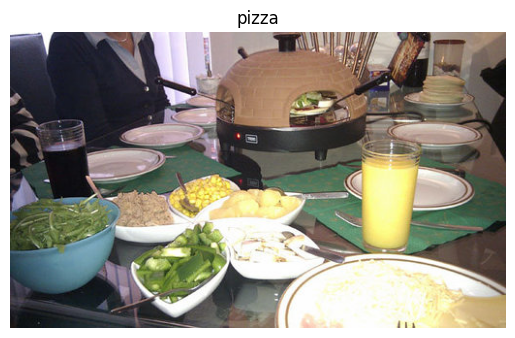

In [10]:
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [11]:
import tensorflow as tf
tf.constant(img)


<tf.Tensor: shape=(306, 512, 3), dtype=uint8, numpy=
array([[[255, 255, 251],
        [255, 255, 251],
        [251, 251, 249],
        ...,
        [160, 132, 111],
        [157, 128, 110],
        [154, 127, 108]],

       [[250, 251, 246],
        [253, 254, 249],
        [249, 250, 245],
        ...,
        [154, 127, 106],
        [149, 122, 103],
        [146, 119, 102]],

       [[253, 255, 254],
        [254, 255, 255],
        [253, 254, 255],
        ...,
        [145, 118,  99],
        [138, 112,  95],
        [134, 108,  93]],

       ...,

       [[ 24,  23,  19],
        [ 27,  23,  20],
        [ 28,  24,  21],
        ...,
        [190, 167, 117],
        [188, 165, 115],
        [185, 163, 113]],

       [[ 29,  25,  26],
        [ 29,  25,  24],
        [ 29,  24,  21],
        ...,
        [188, 164, 116],
        [186, 162, 116],
        [185, 161, 115]],

       [[ 28,  24,  25],
        [ 28,  24,  23],
        [ 28,  23,  20],
        ...,
        [189, 165, 11

In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size = 32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=train_dir,
                                               batch_size = 32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))




Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 27s 450ms/step - loss: 0.6014 - accuracy: 0.6733 - val_loss: 0.4808 - val_accuracy: 0.7813
Epoch 2/5
47/47 [==============================] - 9s 188ms/step - loss: 0.4918 - accuracy: 0.7667 - val_loss: 0.4621 - val_accuracy: 0.7900
Epoch 3/5
47/47 [==============================] - 8s 174ms/step - loss: 0.4532 - accuracy: 0.7840 - val_loss: 0.3960 - val_accuracy: 0.8233
Epoch 4/5
47/47 [==============================] - 10s 207ms/step - loss: 0.4005 - accuracy: 0.8227 - val_loss: 0.3719 - val_accuracy: 0.8407
Epoch 5/5
47/47 [==============================] - 9s 193ms/step - loss: 0.3656 - accuracy: 0.8347 - val_loss: 0.3106 - val_accuracy: 0.8673


In [13]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

In [14]:
tf.random.set_seed(42)

model_2=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224,224,3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 180ms/step - loss: 3.5123 - accuracy: 0.5007 - val_loss: 0.6737 - val_accuracy: 0.5560
Epoch 2/5
47/47 [==============================] - 8s 173ms/step - loss: 0.6809 - accuracy: 0.5373 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 8s 177ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 9s 202ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 9s 195ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [15]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
tf.random.set_seed(42)

model_3=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 162ms/step - loss: 3.6782 - accuracy: 0.6513 - val_loss: 1.6183 - val_accuracy: 0.5487
Epoch 2/5
47/47 [==============================] - 8s 180ms/step - loss: 1.1861 - accuracy: 0.6947 - val_loss: 0.5121 - val_accuracy: 0.7840
Epoch 3/5
47/47 [==============================] - 9s 185ms/step - loss: 1.4412 - accuracy: 0.6753 - val_loss: 1.3257 - val_accuracy: 0.7053
Epoch 4/5
47/47 [==============================] - 8s 180ms/step - loss: 0.8706 - accuracy: 0.7087 - val_loss: 0.4883 - val_accuracy: 0.7753
Epoch 5/5
47/47 [==============================] - 8s 178ms/step - loss: 0.4645 - accuracy: 0.7980 - val_loss: 0.4215 - val_accuracy: 0.8173


In [17]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


['2855315.jpg']
Image shape : (512, 512, 3)
['1468795.jpg']
Image shape : (512, 512, 3)


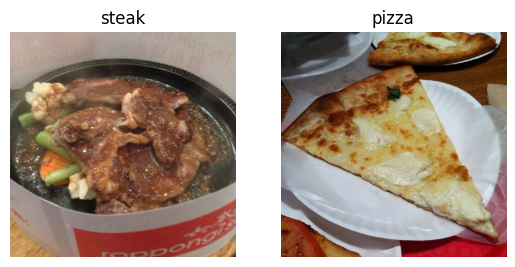

In [18]:
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/","steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/","pizza")

In [19]:
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"


In [20]:
!nvidia-smi

Mon Feb  5 20:30:01 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P0              30W /  70W |   1665MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)


In [22]:
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                          target_size=(224,224),
                                          class_mode="binary",
                                          batch_size=32)

test_data= test_datagen.flow_from_directory(test_dir,
                                       target_size=(224,224),
                                       class_mode="binary",
                                       batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [23]:
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

In [24]:
images[:2], images[0].shape

(array([[[[0.3647059 , 0.10980393, 0.02352941],
          [0.37254903, 0.12941177, 0.03921569],
          [0.37647063, 0.14117648, 0.04705883],
          ...,
          [0.7803922 , 0.58431375, 0.3921569 ],
          [0.7411765 , 0.54509807, 0.3529412 ],
          [0.75294125, 0.5529412 , 0.3372549 ]],
 
         [[0.3647059 , 0.12156864, 0.03921569],
          [0.37254903, 0.12941177, 0.04705883],
          [0.35686275, 0.11764707, 0.03529412],
          ...,
          [0.7490196 , 0.56078434, 0.37254903],
          [0.75294125, 0.5529412 , 0.34509805],
          [0.7725491 , 0.5568628 , 0.33333334]],
 
         [[0.37254903, 0.1254902 , 0.05490196],
          [0.3647059 , 0.11764707, 0.04705883],
          [0.37254903, 0.13333334, 0.05882353],
          ...,
          [0.7607844 , 0.57254905, 0.3921569 ],
          [0.7372549 , 0.52156866, 0.3019608 ],
          [0.78823537, 0.5372549 , 0.29411766]],
 
         ...,
 
         [[0.6156863 , 0.5882353 , 0.5254902 ],
          [0.60392

In [25]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [26]:
model_4 = Sequential([
    Conv2D(filters=10,
           kernel_size=(3,3),
           strides=(1,1),
           padding="valid",
           activation="relu",
           input_shape=(224,224,3)),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid")


])

In [27]:
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [28]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 139ms/step - loss: 0.9156 - accuracy: 0.6253 - val_loss: 0.4747 - val_accuracy: 0.7960
Epoch 2/5
47/47 [==============================] - 6s 137ms/step - loss: 0.4499 - accuracy: 0.8067 - val_loss: 0.4536 - val_accuracy: 0.7900
Epoch 3/5
47/47 [==============================] - 6s 127ms/step - loss: 0.3477 - accuracy: 0.8647 - val_loss: 0.3731 - val_accuracy: 0.8460
Epoch 4/5
47/47 [==============================] - ETA: 0s - loss: 0.1908 - accuracy: 0.9400

In [ ]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7));

In [ ]:
def plot_loss_curves(history):
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs= range(len(history.history["loss"]))

  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()


  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend();

In [ ]:
plot_loss_curves(history_4)

In [ ]:
model_5=Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")

])

In [ ]:
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(valid_data))

In [ ]:
model_5.summary()

In [ ]:
plot_loss_curves(history_5)

In [38]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True)

train_datagen = ImageDataGenerator(rescale=1/255.)

test_datagen = ImageDataGenerator(rescale=1/255.)



In [39]:
print("Augumented training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False)




print("Non-Augumented training data")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False
                                              )

IMG_SIZE = (224,224)
print("Non-Augumented test data")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE,
                                             batch_size=32,
                                             class_mode="binary"
                                            )



Augumented training data
Found 1500 images belonging to 2 classes.
Non-Augumented training data
Found 1500 images belonging to 2 classes.
Non-Augumented test data
Found 500 images belonging to 2 classes.


In [40]:
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

showing image number: 7


(-0.5, 223.5, 223.5, -0.5)

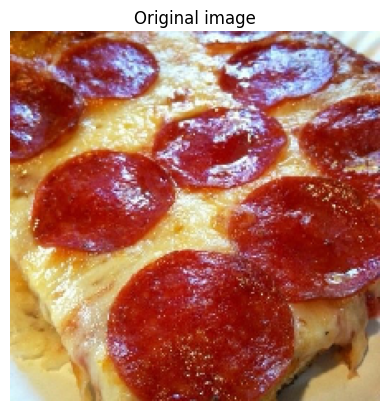

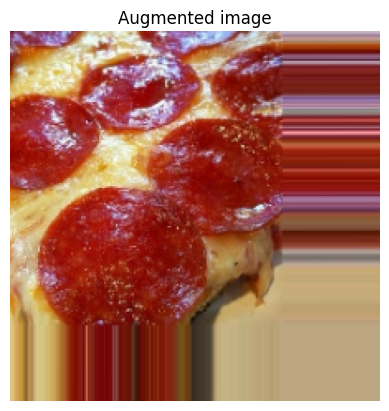

In [41]:
import random
random_number = random.randint(0, 31)
print(f"showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False)


In [42]:
model_6=Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")

])

model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - ETA: 0s - loss: 0.7186 - accuracy: 0.4147

47/47 [==============================] - 28s 561ms/step - loss: 0.7186 - accuracy: 0.4147 - val_loss: 0.6909 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 21s 443ms/step - loss: 0.6913 - accuracy: 0.4893
Epoch 3/5
47/47 [==============================] - 22s 470ms/step - loss: 0.6889 - accuracy: 0.4993
Epoch 4/5
47/47 [==============================] - 20s 423ms/step - loss: 0.6830 - accuracy: 0.5700
Epoch 5/5
47/47 [==============================] - 20s 428ms/step - loss: 0.6775 - accuracy: 0.6247


ValueError: x and y must have same first dimension, but have shapes (5,) and (1,)

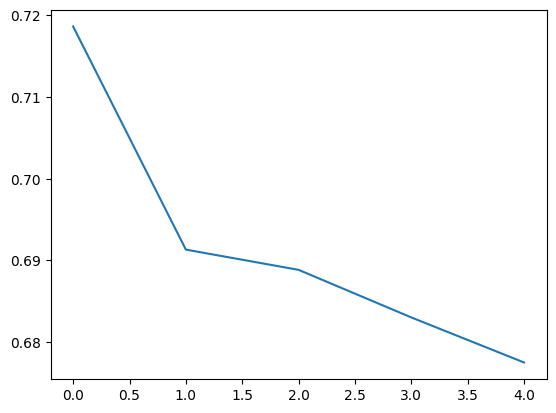

In [43]:
plot_loss_curves(history_6)

In [44]:
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=True)



Found 1500 images belonging to 2 classes.


In [45]:
model_7=Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")

])

model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 23s 444ms/step - loss: 0.6369 - accuracy: 0.6507 - val_loss: 0.5033 - val_accuracy: 0.7740
Epoch 2/5
47/47 [==============================] - 22s 463ms/step - loss: 0.5588 - accuracy: 0.7207 - val_loss: 0.4388 - val_accuracy: 0.7980
Epoch 3/5
47/47 [==============================] - 22s 467ms/step - loss: 0.5083 - accuracy: 0.7680 - val_loss: 0.4319 - val_accuracy: 0.8040
Epoch 4/5
47/47 [==============================] - 23s 478ms/step - loss: 0.4949 - accuracy: 0.7593 - val_loss: 0.3553 - val_accuracy: 0.8560
Epoch 5/5
47/47 [==============================] - 22s 461ms/step - loss: 0.4631 - accuracy: 0.7853 - val_loss: 0.3488 - val_accuracy: 0.8560


ValueError: x and y must have same first dimension, but have shapes (5,) and (1,)

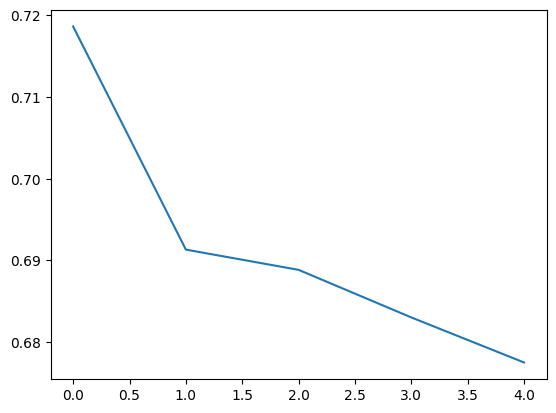

In [46]:
plot_loss_curves(history_6)

In [47]:
print(class_names)

['pizza' 'steak']


--2024-02-05 20:48:07--  https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-steak.jpeg?raw=true
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/mrdbourke/tensorflow-deep-learning/raw/main/images/03-steak.jpeg [following]
--2024-02-05 20:48:07--  https://github.com/mrdbourke/tensorflow-deep-learning/raw/main/images/03-steak.jpeg
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg [following]
--2024-02-05 20:48:08--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.

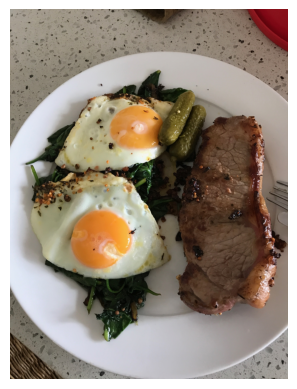

In [48]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt


!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-steak.jpeg?raw=true
steak = mpimg.imread("03-steak.jpeg?raw=true")
plt.imshow(steak)
plt.axis(False);

In [50]:
def load_and_prep_image(filename, img_shape=224):

  img = tf.io.read_file(filename)
  img= tf.image.decode_image(img)
  img = tf.image.resize(img,size=[img_shape, img_shape])
  img=img/255.
  return img

In [54]:
steak = load_and_prep_image("03-steak.jpeg?raw=true")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [58]:
pred=model_7.predict(tf.expand_dims(steak, axis=0))
pred

1/1 [==============================] - 0s 28ms/step


array([[0.91721]], dtype=float32)

In [56]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [59]:
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [60]:
def pred_and_plot(model, filename, class_names=class_names):

  img = load_and_prep_image(filename)
  pred = model.predict(tf.expand_dims(img, axis=0))
  pred_class = class_names[int(tf.round(pred))]
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);


1/1 [==============================] - 0s 18ms/step


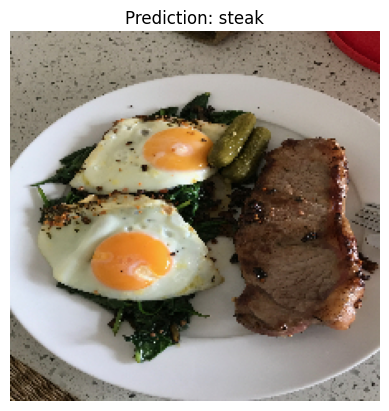

In [61]:
pred_and_plot(model_7, "03-steak.jpeg?raw=true")

--2024-02-05 21:03:16--  https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-pizza-dad.jpeg?raw=true
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/mrdbourke/tensorflow-deep-learning/raw/main/images/03-pizza-dad.jpeg [following]
--2024-02-05 21:03:17--  https://github.com/mrdbourke/tensorflow-deep-learning/raw/main/images/03-pizza-dad.jpeg
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg [following]
--2024-02-05 21:03:17--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to ra

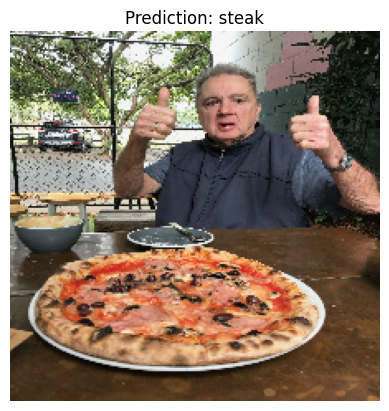

In [65]:
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-pizza-dad.jpeg?raw=true
pred_and_plot(model_7, "03-pizza-dad.jpeg?raw=true")

In [66]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip","r")
zip_ref.extractall()
zip_ref.close()

--2024-02-05 21:05:25--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.170.207, 142.251.175.207, 74.125.24.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.170.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  20.6MB/s    in 25s     

2024-02-05 21:05:51 (19.6 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [67]:
import os

for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.

In [69]:
!ls -la 10_food_classes_all_data/

total 16
drwxr-xr-x  4 root root 4096 Feb  5 21:05 .
drwxr-xr-x  1 root root 4096 Feb  5 21:05 ..
drwxr-xr-x 12 root root 4096 Feb  5 21:05 test
drwxr-xr-x 12 root root 4096 Feb  5 21:05 train


In [70]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [71]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['1421149.jpg']
Image shape : (512, 512, 3)


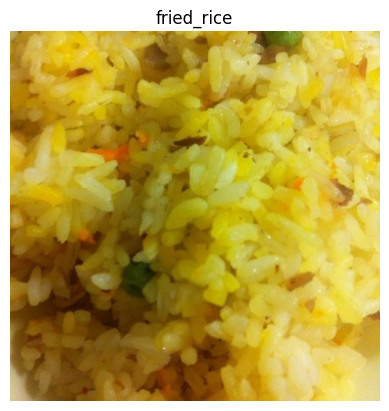

In [73]:
import random
img = view_random_image(target_dir = train_dir,
                        target_class = random.choice(class_names))


In [75]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="categorical")




Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [76]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

model_8 = Sequential([
    Conv2D(10, 3, input_shape=(224,224,3)),
    Activation(activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])

model_8.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [79]:
history_8 = model_8.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 34s 134ms/step - loss: 2.2715 - accuracy: 0.1453 - val_loss: 2.1762 - val_accuracy: 0.2088
Epoch 2/5
235/235 [==============================] - 34s 145ms/step - loss: 2.0923 - accuracy: 0.2583 - val_loss: 2.0804 - val_accuracy: 0.2588
Epoch 3/5
235/235 [==============================] - 31s 132ms/step - loss: 1.7900 - accuracy: 0.3821 - val_loss: 1.8615 - val_accuracy: 0.3504
Epoch 4/5
235/235 [==============================] - 29s 121ms/step - loss: 1.1951 - accuracy: 0.6041 - val_loss: 2.1341 - val_accuracy: 0.3016
Epoch 5/5
235/235 [==============================] - 29s 125ms/step - loss: 0.5580 - accuracy: 0.8196 - val_loss: 2.9840 - val_accuracy: 0.2832


In [80]:
model_8.evaluate(test_data)

79/79 [==============================] - 8s 104ms/step - loss: 2.9840 - accuracy: 0.2832


[2.9839673042297363, 0.2831999957561493]

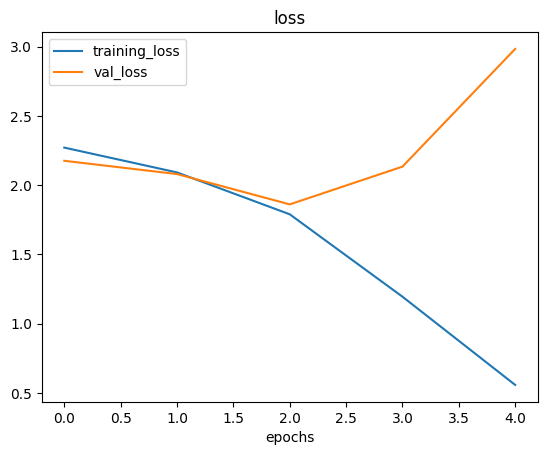

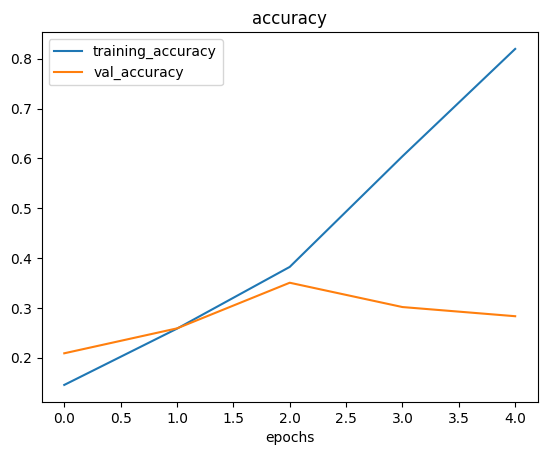

In [81]:
plot_loss_curves(history_8)

In [82]:
model_9=Sequential([
     Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")

])

model_9.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [83]:
history_9 = model_9.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 39s 153ms/step - loss: 2.0933 - accuracy: 0.2517 - val_loss: 1.9312 - val_accuracy: 0.3344
Epoch 2/5
235/235 [==============================] - 29s 122ms/step - loss: 1.6810 - accuracy: 0.4373 - val_loss: 1.9032 - val_accuracy: 0.3424
Epoch 3/5
235/235 [==============================] - 29s 123ms/step - loss: 1.2259 - accuracy: 0.6064 - val_loss: 2.0660 - val_accuracy: 0.3212
Epoch 4/5
235/235 [==============================] - 28s 120ms/step - loss: 0.7061 - accuracy: 0.7891 - val_loss: 2.3920 - val_accuracy: 0.2816
Epoch 5/5
235/235 [==============================] - 30s 127ms/step - loss: 0.3264 - accuracy: 0.9201 - val_loss: 2.8580 - val_accuracy: 0.3012


In [84]:
model_9.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 111, 111, 10)      0         
 ng2D)                                                           
                                                                 
 conv2d_21 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 54, 54, 10)        0         
 ng2D)                                                           
                                                                 
 flatten_8 (Flatten)         (None, 29160)             0         
                                                                 
 dense_13 (Dense)            (None, 10)               

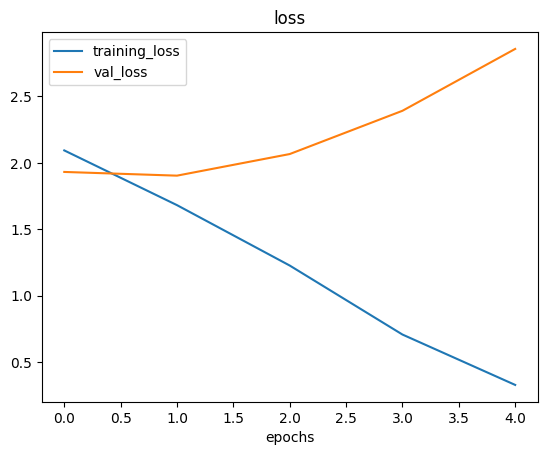

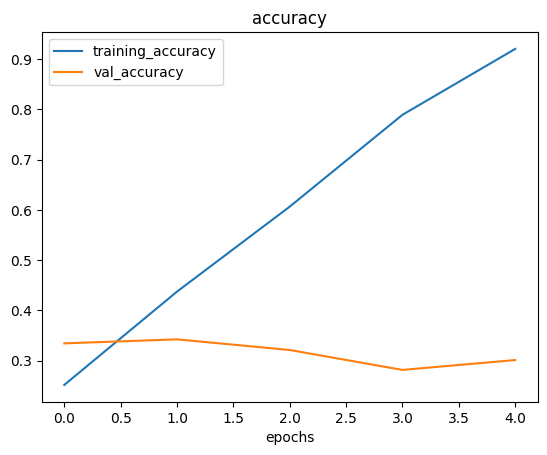

In [85]:
plot_loss_curves(history_9)

In [86]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="categorical")

Found 7500 images belonging to 10 classes.


In [87]:
model_10 = tf.keras.models.clone_model(model_8)

model_10.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [88]:
model_10.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 activation (Activation)     (None, 222, 222, 10)      0         
                                                                 
 conv2d_17 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 110, 110, 10)      0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_19 (Conv2D)          (None, 106, 106, 10)      910       
                                                      

In [89]:
history_10= model_10.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 135s 563ms/step - loss: 2.2179 - accuracy: 0.1728 - val_loss: 2.0842 - val_accuracy: 0.2276
Epoch 2/5
235/235 [==============================] - 109s 466ms/step - loss: 2.1010 - accuracy: 0.2431 - val_loss: 1.9359 - val_accuracy: 0.3172
Epoch 3/5
235/235 [==============================] - 109s 464ms/step - loss: 2.0227 - accuracy: 0.2796 - val_loss: 1.8797 - val_accuracy: 0.3420
Epoch 4/5
235/235 [==============================] - 108s 458ms/step - loss: 1.9701 - accuracy: 0.3089 - val_loss: 1.8707 - val_accuracy: 0.3496
Epoch 5/5
235/235 [==============================] - 108s 461ms/step - loss: 1.9382 - accuracy: 0.3171 - val_loss: 1.7991 - val_accuracy: 0.3780


In [90]:
model_10.evaluate(test_data)

79/79 [==============================] - 7s 93ms/step - loss: 1.7991 - accuracy: 0.3780


[1.799124002456665, 0.3779999911785126]

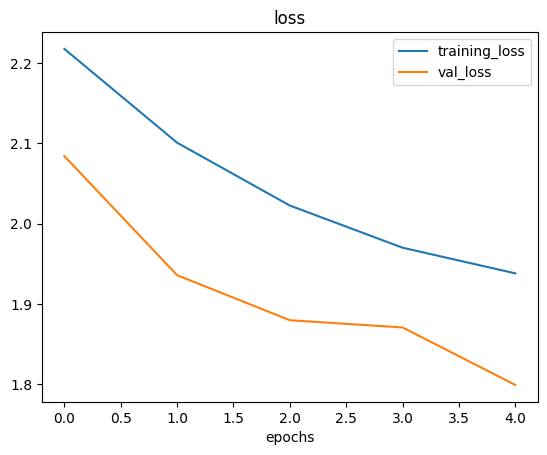

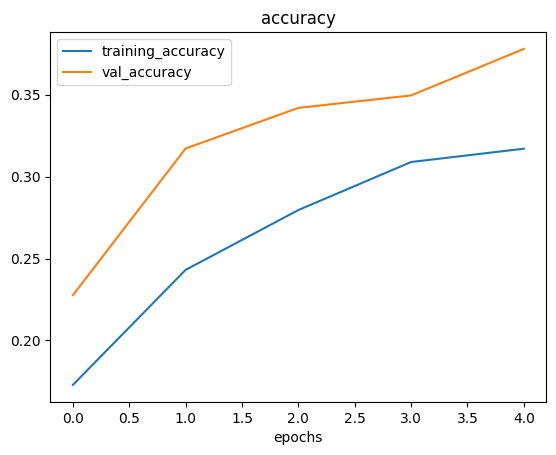

In [91]:
plot_loss_curves(history_10)

In [92]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [93]:

!wget  https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-pizza-dad.jpeg?raw=true

!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-hamburger.jpeg?raw=true
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-sushi.jpeg?raw=true
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-steak.jpeg?raw=true

--2024-02-05 21:54:22--  https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-pizza-dad.jpeg?raw=true
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/mrdbourke/tensorflow-deep-learning/raw/main/images/03-pizza-dad.jpeg [following]
--2024-02-05 21:54:23--  https://github.com/mrdbourke/tensorflow-deep-learning/raw/main/images/03-pizza-dad.jpeg
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg [following]
--2024-02-05 21:54:23--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to ra

In [95]:
def pred_and_plot(model, filename, class_names=class_names):

  img = load_and_prep_image(filename)
  pred = model.predict(tf.expand_dims(img, axis=0))
  print(len(pred[0]))
  if len(pred[0])>1:
    pred_class = class_names[tf.argmax(pred)]
  else:
    pred_class = class_names[int(tf.round(pred))]
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 23ms/step
10


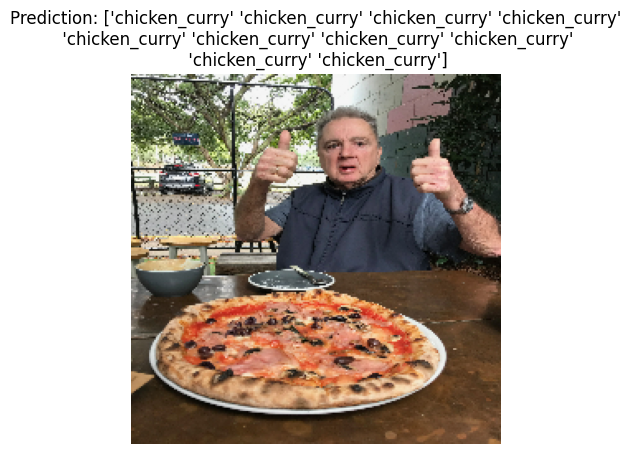

In [96]:
pred_and_plot(model=model_10,
              filename="03-pizza-dad.jpeg?raw=true",
              class_names=class_names)

1/1 [==============================] - 0s 18ms/step
10


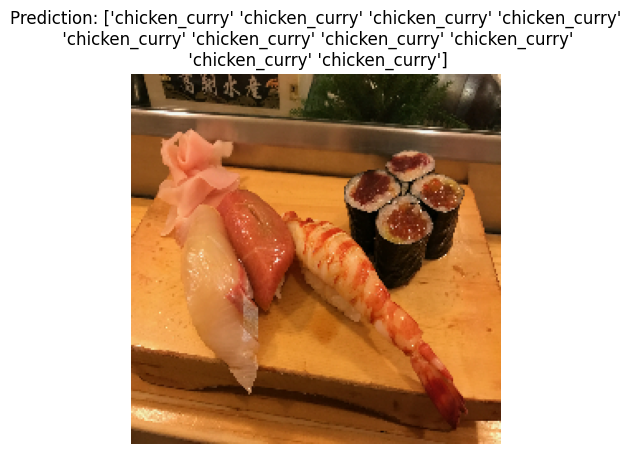

In [97]:
pred_and_plot(model=model_10,
              filename="03-sushi.jpeg?raw=true",
              class_names=class_names)

In [98]:
model_10.save("saved_trained_model_10")

In [99]:
loaded_model_10 = tf.keras.models.load_model("saved_trained_model_10")
loaded_model_10.evaluate(test_data)

79/79 [==============================] - 10s 123ms/step - loss: 1.7991 - accuracy: 0.3780


[1.7991245985031128, 0.3779999911785126]

In [100]:
model_10.evaluate(test_data)

79/79 [==============================] - 7s 87ms/step - loss: 1.7991 - accuracy: 0.3780


[1.7991242408752441, 0.3779999911785126]